In [8]:
%matplotlib notebook

import numpy as np
from PIL import Image
#im = Image.open('img.tif')
#im.show()
#x = np.tile(0, (256, 256))
#print(x)

size = 256
shape = (size,size)
val = 0
dt = np.double
x = np.empty(shape,dtype=dt)
x.fill(val)
#print(x)
y = np.empty(shape,dtype=dt)
y.fill(val)
#print(y)

In [9]:
for m in range(256):
    for n in range(256):
        if m == 127 and n == 127:
            y[m][n] = 0.01 + 0.9*(y[m-1][n] + y[m][n-1]) - 0.81*y[m-1][n-1]
        else:
            y[m][n] = 0.9*(y[m-1][n] + y[m][n-1]) - 0.81*y[m-1][n-1]

In [10]:
print(y)
img_out = Image.fromarray((255*100*y).astype(np.uint8))
img_out.save('h_out.tif')

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-2.70526898e-12 -2.43474208e-12 -2.19126787e-12 ...  2.94518363e-14
   2.65066527e-14  2.38559874e-14]
 [-2.45406543e-12 -2.20865889e-12 -1.98779300e-12 ...  2.65066527e-14
   2.38559874e-14  2.14703887e-14]
 [-2.22604990e-12 -2.00344491e-12 -1.80310042e-12 ...  2.38559874e-14
   2.14703887e-14  1.93233498e-14]]


In [11]:
# plotting |H|
import matplotlib.pyplot as plt
from matplotlib import cm
from math import e
import io


def absH(mu, nu):
    a = 1 - 0.9*(np.cos(mu) + np.cos(nu)) + 0.81*(np.cos(mu + nu))
    b = 0.9*(np.sin(mu) + np.sin(nu)) - 0.81*(np.sin(mu + nu))
    k = 0.01/(a**2 + b**2)
    return k*np.sqrt(a**2 + b**2)

In [12]:
mu = np.linspace(-np.pi,np.pi,180)
nu = np.linspace(-np.pi,np.pi,180)

X, Y = np.meshgrid(mu, nu)
Z = absH(X, Y)

<IPython.core.display.Javascript object>


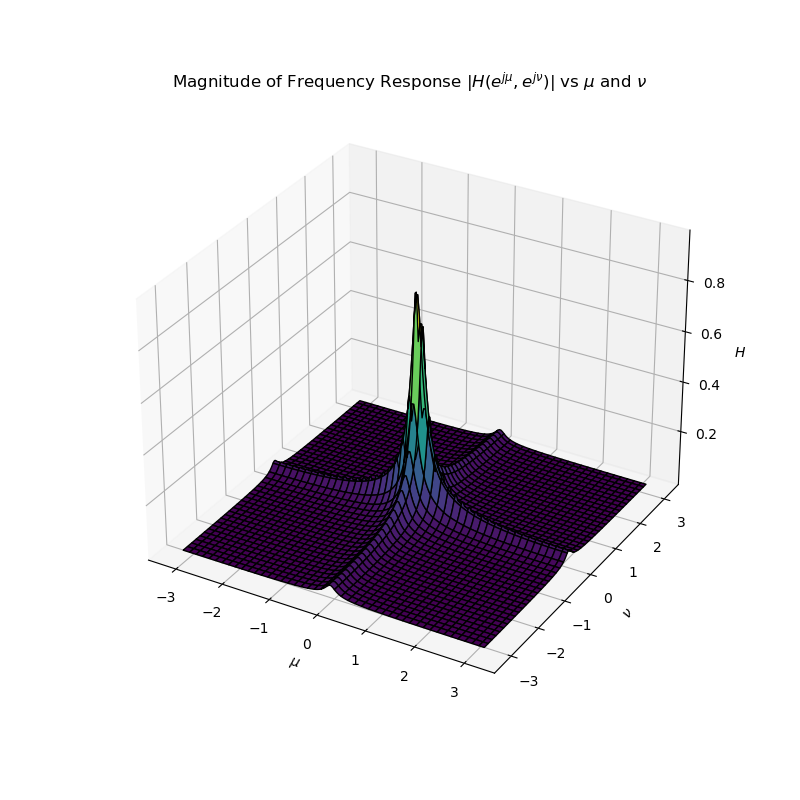

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$H$')
ax.set_title('Magnitude of Frequency Response ' + r'$|H(e^{j\mu}, e^{j\nu})|$' + ' vs ' + r'$\mu$' + ' and ' + r'$\nu$')
fig.set_figwidth(8)
fig.set_figheight(8)
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor=(0,0,0))
plt.show()

In [14]:
#print(absH(0, 0))

# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
img_out = Image.open(png1)

# Save as TIFF
img_out.save("HPlotQ5.tif")
png1.close()